INSTALLING AND IMPORTING IMPORTANT LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import re

nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


LOAD AND EXPLORE DATA

In [5]:
df = pd.read_csv('/content/twitter_training.csv', header=None) # ADDING THIS , header=None WILL REMOVE ALL HEADER because if there are no proper headers in dataset sentiments will now be differentiated properly
df.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Manually Set Proper Column Headers

In [6]:
# Load the dataset WITHOUT header
df = pd.read_csv('/content/twitter_training.csv', header=None)

# Set proper column names manually
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']


EXPLORE THE DATA

In [7]:
df.info()  # structure of the dataset
df.describe()  # summary stats if numeric cols exist
df['Sentiment'].value_counts()  # check sentiment categories


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46295 entries, 0 to 46294
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         46295 non-null  int64 
 1   Entity     46295 non-null  object
 2   Sentiment  46295 non-null  object
 3   Tweet      45850 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


,count
Sentiment,
Positive,13710
Negative,12300
Neutral,11483
Irrelevant,8802


Clean the Tweet Text

In [8]:
def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))  # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)      # remove mentions/hashtags
    text = re.sub(r"[^\w\s]", "", text)        # remove punctuation
    text = text.lower()                        # lowercase
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)


 Visualize Sentiment Distribution

/tmp/ipython-input-9-2931985068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


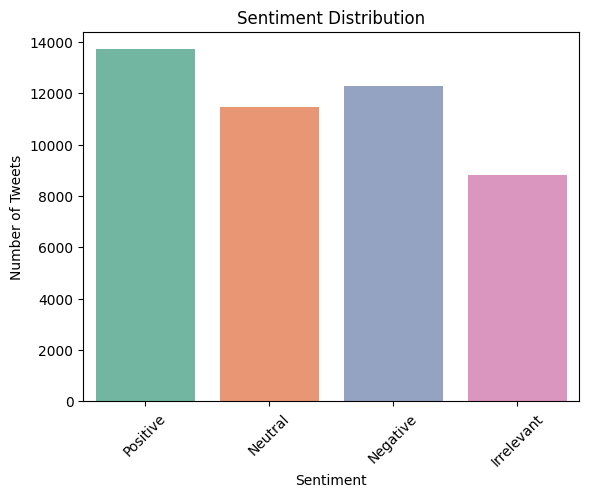

In [9]:
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()



Word Clouds per Sentiment

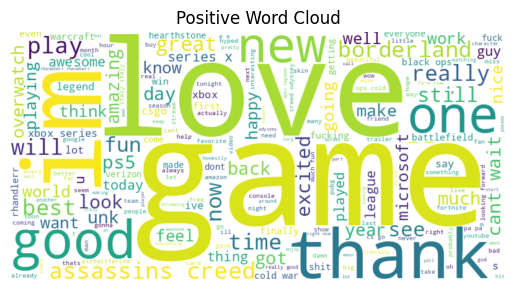

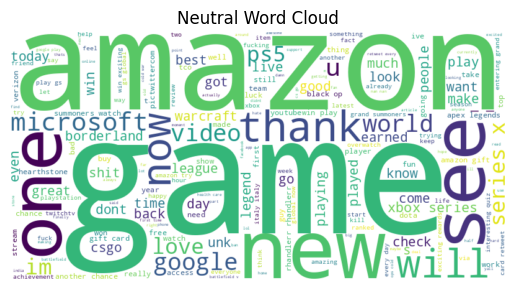

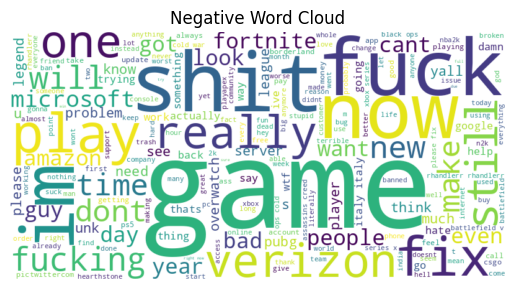

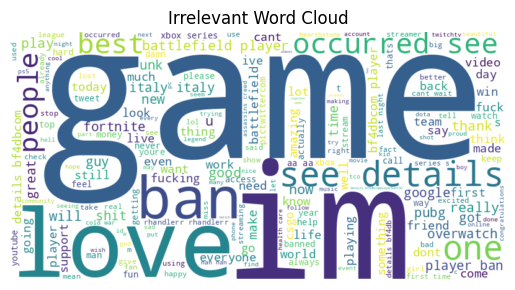

In [10]:
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{sentiment} Word Cloud")
    plt.show()


Save Clean Data


In [11]:
df.to_csv("Cleaned_Twitter_Training.csv", index=False)
